<a href="https://colab.research.google.com/github/amarnepali/Dogs_vs_Cats/blob/master/bear_classifier_resnet34.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
folder='black'
file= 'black_bear.txt'


In [0]:
folder='grizzy'
file= 'grizzly_bear.txt'

In [0]:
folder='teddy'
file= 'teddy.txt'

In [0]:
path = Path('data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
classes=['teddy','grizzy','black']

In [14]:
download_images(path/file, dest, max_pics=200)

In [21]:
for c in classes:
  print(c)
  verify_images(path/c, delete=True, max_size=500)


teddy


grizzy


black


In [0]:
#### view data

np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".",valid_pct=0.2, ds_tfms=get_transforms(),size=224, num_workers=4).normalize(imagenet_stats)

In [23]:
data.classes

['black', 'grizzy', 'teddy']

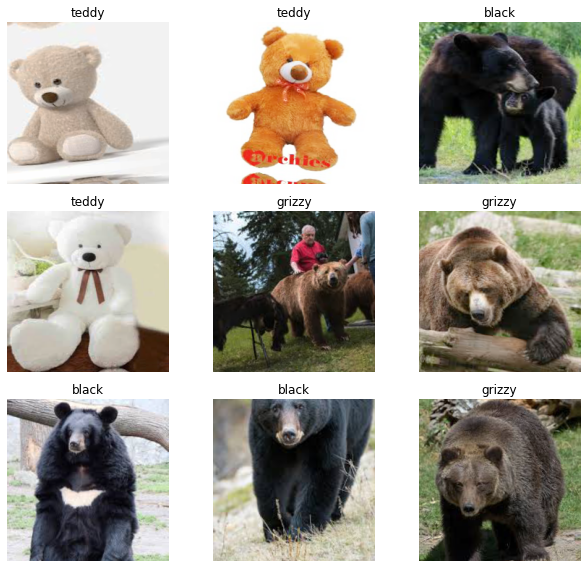

In [27]:
data.show_batch(rows=3,figsize=(9,8))


In [30]:
data.classes, data.c, len(data.train_ds),len(data.valid_ds)


(['black', 'grizzy', 'teddy'], 3, 260, 65)

In [32]:
######train_ model##########


learn=create_cnn(data, models.resnet34, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [33]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.693758,0.101297,0.046154,01:11
1,0.946049,0.023619,0.000000,01:09
2,0.636617,0.032201,0.015385,01:09
3,0.466979,0.032745,0.015385,01:09


In [0]:
learn.save('stage_1')

In [0]:
learn.unfreeze()   #### Unfreeze the layers It sets every layer group to trainable

In [37]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


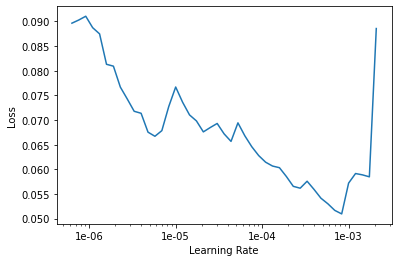

In [38]:
learn.recorder.plot()

In [39]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.054576,0.059037,0.030769,01:34
1,0.042507,0.022285,0.000000,01:34


In [41]:
learn.fit_one_cycle(2, max_lr=slice(3e-4,3e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.028828,0.491383,0.123077,01:35
1,0.153604,0.228528,0.061538,01:38


In [0]:
learn.save('stage-2')

In [46]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (260 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
black,black,black,black,black
Path: data/bears;

Valid: LabelList (65 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
teddy,black,grizzy,black,black
Path: data/bears;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runnin

In [47]:
interp = ClassificationInterpretation.from_learner(learn)

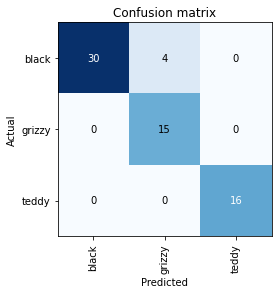

In [48]:
interp.plot_confusion_matrix()

In [0]:
learn.export()

In [0]:
img=open_image(path/'teddy'/'00000011.jpg')

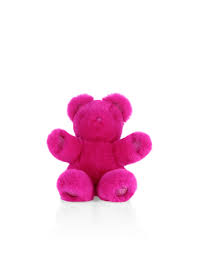

In [64]:
img

In [0]:
pred_class, pred_idx,output =learn.predict(img)

In [66]:
print(pred_class, pred_idx,output)

teddy tensor(2) tensor([6.0328e-05, 9.2207e-04, 9.9902e-01])


In [67]:
classes

['teddy', 'grizzy', 'black']